In [37]:
import torch
import numpy
import matplotlib.pyplot as plt
from leapfrog import *

In [38]:
torch.set_default_dtype(torch.float64)

In [ ]:
# Parameters
mu = 0.249 * 2.0 * torch.pi  # rotation frequency
k3 = 2.0                     # octupole strength
period = 1.0                 # period of the system
s0 = 0.5                     # position of the perturbation

def hamiltonian_fn(q, p, s):
    H = mu / 2.0 * (q**2 + p**2) + k3 / 4.0 * torch.exp(-1000 * (s % period - s0)**2) * q**4
    return H

def q_prime(q, p, s):
    return mu * p

def p_prime(q, p, s):
    return -mu * q - k3 * torch.exp(-1000 * (s % period - s0)**2) * q**3

In [139]:
hamiltonian = Hamiltonian(hamiltonian_fn, q_prime, p_prime)
integrator = Leapfrog(hamiltonian, step_size=0.01)

In [ ]:
steps = 200000
n_particles = 20

q = torch.zeros(n_particles, steps+1)
p = torch.zeros(n_particles, steps+1)

q[:, 0] = torch.linspace(0, 0.7, n_particles)
p[:, 0] = torch.zeros(n_particles)
for i in range(steps):
    q[:, i+1], p[:, i+1] = integrator.step(q[:, i], p[:, i], s=torch.tensor([i*integrator.step_size]))

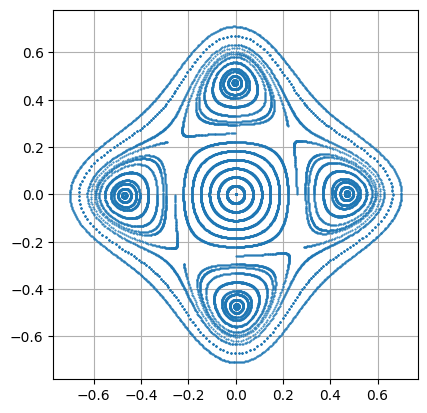

In [149]:
plt.plot(q.numpy()[:, ::100], p.numpy()[:, ::100], '.', markersize=1, color='C0')
plt.gca().set_aspect('equal')
plt.grid()

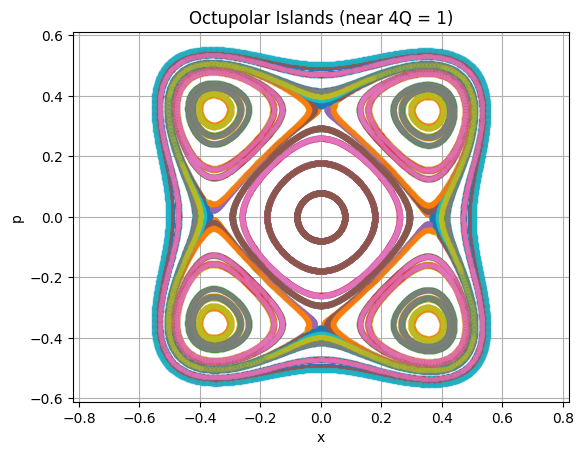

In [215]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu = 2 * np.pi * 0.249  # Tune near 1/4
epsilon = 0.1
N = 1000

# Initial conditions grid
X, P = np.meshgrid(np.linspace(-0.5, 0.5, 10), np.linspace(-0.5, 0.5, 10))
X, P = X.flatten(), P.flatten()

# Tracking
trajectories = []

for x0, p0 in zip(X, P):
    x, p = x0, p0
    xs, ps = [], []
    for _ in range(N):
        x_new = x * np.cos(mu) + p * np.sin(mu)
        p_new = -x * np.sin(mu) + p * np.cos(mu) - epsilon * x_new**3
        x, p = x_new, p_new
        xs.append(x)
        ps.append(p)
    trajectories.append((xs, ps))

# Plot
idx = 0
for xs, ps in trajectories:
    #if idx % 4 == 0:
    plt.plot(xs, ps, '.', alpha=0.3, linewidth=0.5)
    #idx += 1

plt.xlabel('x')
plt.ylabel('p')
plt.title('Octupolar Islands (near 4Q = 1)')
plt.axis('equal')
plt.grid(True)
plt.show()